# Guía de referencia: Cómo manejar los valores atípicos




Cuando se trata de análisis de datos exploratorios, o EDA, existen esencialmente tres formas principales de manejar los valores atípicos: eliminarlos, reasignarlos o dejarlos.

Ya sea que mantenga los valores atípicos como están, los elimine o reasigne valores, es una decisión que debe tomar en base a conjunto de datos. Para ayudarte a tomar la decisión, puedes comenzar con estas pautas generales:

- Elimínelos : si está seguro de que los valores atípicos son errores, errores tipográficos o errores y el conjunto de datos se usará para modelado o aprendizaje automático, entonces es más probable que decida eliminar los valores atípicos. De las tres opciones, usarás esta menos. 

- Reasignarlos : si el conjunto de datos es pequeño y/o los datos se utilizarán para el modelado o el aprendizaje automático, es más probable que elija un camino para derivar nuevos valores para reemplazar los valores atípicos. 

- Déjelos : para un conjunto de datos en el que planea hacer análisis/EDA y nada más, o para un conjunto de datos que está preparando para un modelo que es resistente a los valores atípicos, lo más probable es que los deje.



## Eliminarlos. 

Para una forma de eliminar valores atípicos. Creamos un diagrama de caja para ayudar a visualizar dos valores atípicos diferentes, como se muestra aquí:

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [20]:
df = pd.read_csv('./ex_datos_faltantes/eda_outliers_dataset1.csv') 
df.head()

,year,number_of_strikes
0,2020,15620068
1,2019,209166
2,2018,44600989
3,2017,35095195
4,2016,41582229


In [21]:
def readable_numbers(x):
    """toma un número grande y lo formatea en K, M para que sea más legible"""
    if x >= 1e6:
        s = '{:1.1f}M'.format(x*1e-6)
    else:
        s = '{:1.0f}K'.format(x*1e-3)
    return s

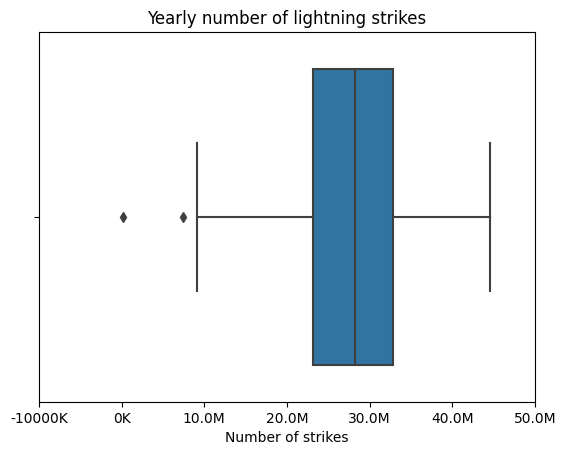

In [22]:
box = sns.boxplot(x=df['number_of_strikes'])
g = plt.gca()
# box.set_xticklabels(np.array([readable_numbers(x) for x in g.get_xticks()]))


# Obtener las ubicaciones actuales de las etiquetas
xtick_locs = g.get_xticks()

# Obtener las etiquetas personalizadas usando la función readable_numbers
xtick_labels = [readable_numbers(x) for x in xtick_locs]

# Establecer las ubicaciones y etiquetas personalizadas
g.set_xticks(xtick_locs)
g.set_xticklabels(xtick_labels)

plt.xlabel('Number of strikes')
plt.title('Yearly number of lightning strikes');

In [23]:
# Calculate 25th percentile of annual strikes
percentile25 = df['number_of_strikes'].quantile(0.25)

# Calculate 75th percentile of annual strikes
percentile75 = df['number_of_strikes'].quantile(0.75)

# Calculate interquartile range
iqr = percentile75 - percentile25

# Calculate upper and lower thresholds for outliers
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

print('Lower limit is: ', lower_limit)

Lower limit is:  8585016.625


A continuación, se utilizó una máscara booleana para filtrar el marco de datos, de modo que solo contuviera filas en las que el número de avisos fuera menor que el límite inferior.

In [24]:
print(df[df['number_of_strikes'] < lower_limit])

    year  number_of_strikes
1   2019             209166
33  1987            7378836


Una vez que conozca los puntos de corte para los valores atípicos, si desea eliminarlos, puede usar una máscara booleana para seleccionar todas las filas de modo que: límite inferior ≤ valores ≤ límite superior.  

In [25]:
mask = (df['number_of_strikes'] >= lower_limit) & (df['number_of_strikes'] <=
upper_limit)

df = df[mask].copy()
print(df)

    year  number_of_strikes
0   2020           15620068
2   2018           44600989
3   2017           35095195
4   2016           41582229
5   2015           37894191
6   2014           34919173
7   2013           27600898
8   2012           28807552
9   2011           31392058
10  2010           29068965
11  2009           30100585
12  2008           29790934
13  2007           30529064
14  2006           33292382
15  2005           38168699
16  2004           40023951
17  2003           39092327
18  2002           29916767
19  2001           25470095
20  2000           26276135
21  1999           27758681
22  1998           28802221
23  1997           26986915
24  1996           26190094
25  1995           22763540
26  1994           25094010
27  1993           24206929
28  1992           16371876
29  1991           16900934
30  1990           15839052
31  1989           14245186
32  1988            9150440


A continuación, considerará reasignar valores atípicos derivando nuevos valores que se ajusten mejor al conjunto de datos. 

## Reasignarlos.



En lugar de eliminar valores atípicos, siempre puede reasignarlos, es decir, cambiar los valores por otros que se ajusten a la distribución general del conjunto de datos. Hay dos formas comunes de hacer esto, pero se pueden usar muchas formas diferentes, según su caso de uso:

1. Cree un suelo y un techo en un cuantil: 
    
    Por ejemplo, podría colocar paredes en el percentil 90 y 10 de la distribución de valores de datos. Cualquier valor por encima de la marca del 90 % o por debajo de la marca del 10 % se cambia para ajustarse a las paredes que establezca. Aquí hay un ejemplo de cómo podría verse ese código:

In [28]:
# Calculate 10th percentile
tenth_percentile = np.percentile(df['number_of_strikes'], 10)

# Calculate 90th percentile
ninetieth_percentile = np.percentile(df['number_of_strikes'], 90)

# Apply lambda function to replace outliers with thresholds defined above
df['number_of_strikes'] = df['number_of_strikes'].apply(lambda x: (
    tenth_percentile if x < tenth_percentile 
    else ninetieth_percentile if x > ninetieth_percentile 
    else x))

In [29]:
df

,year,number_of_strikes
0,2020,15940288.56
2,2018,38916837.68
3,2017,35095195.00
4,2016,38916837.68
5,2015,37894191.00
6,2014,34919173.00
7,2013,27600898.00
8,2012,28807552.00
9,2011,31392058.00
10,2010,29068965.00


2. Impute el promedio:   
    
    En algunos casos, podría ser mejor reasignar todos los valores atípicos para que coincidan con la mediana o el valor medio. Esto asegurará que su mediana y distribución se basen únicamente en los valores no atípicos, dejando excluidos los atípicos originales. La imputación real o reasignación de valores puede ser bastante simple si ya ha encontrado los valores atípicos. El siguiente bloque de código calcula la mediana de los valores mayores que el límite inferior. Luego imputa la mediana donde los valores son más bajos que el límite inferior.



In [30]:
# Calculate median of all NON-OUTLIER values
median = np.median(df['number_of_strikes'][df['number_of_strikes'] >= lower_limit])

# Impute the median for all values < lower_limit
df['number_of_strikes'] = np.where(df['number_of_strikes'] < lower_limit, median, df['number_of_strikes'] )

df

,year,number_of_strikes
0,2020,15940288.56
2,2018,38916837.68
3,2017,35095195.00
4,2016,38916837.68
5,2015,37894191.00
6,2014,34919173.00
7,2013,27600898.00
8,2012,28807552.00
9,2011,31392058.00
10,2010,29068965.00


Fuera de EDA, el aprendizaje automático y el modelado de regresión tienen variaciones más complejas en el manejo de valores atípicos. 


> Conclusiones clave  
Después de detectar los valores atípicos en un conjunto de datos, es esencial que determine una estrategia sobre cómo manejarlos. Debido a que cada conjunto de datos y problema basado en datos es diferente, su estrategia variará. En su mayor parte, elegirá entre eliminar, reasignar o dejar valores atípicos.